<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/TP6_Architectures_avancees_de_deep_learning_MLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TP6: Architectures avancees de deep learning**





In [28]:
# Importations nécessaires pour tous les exercices
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input, decode_predictions


## ***EXERCICE 1 : Tenseurs, couches***


In [29]:
# Charger les données banknotes
X_train_banknotes = np.load('X_train.npy')
y_train_banknotes = np.load('y_train.npy')
X_test_banknotes = np.load('X_test.npy')
y_test_banknotes = np.load('y_test.npy')

# Question 1 : Importer Model (déjà fait en haut)
print("\n1) Model importé")

# Question 2 : Créer le modèle avec l'API fonctionnelle
print("\n2) Création du modèle avec entrées et sorties définies")
from tensorflow.keras import Input

# Définir l'entrée explicitement
inputs = Input(shape=(4,))
x = Dense(2, activation='relu', kernel_initializer='normal')(inputs)
outputs = Dense(1, activation='sigmoid')(x)

# Créer le modèle
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Question 3 : Créer le sous-modèle de la première couche
print("\n3) Création du sous-modèle inp_to_out")
first_layer_output = model.layers[1].output  # La première Dense est layers[1]
inp_to_out = Model(inputs=model.input, outputs=first_layer_output)

# Question 4 : Afficher les résultats sur X_test
print("\n4) Résultats du passage de X_test à travers la première couche")
results = inp_to_out.predict(X_test_banknotes, verbose=0)
print(f"Shape des résultats: {results.shape}")
print(f"Premiers résultats:\n{results[:5]}")




1) Model importé

2) Création du modèle avec entrées et sorties définies

3) Création du sous-modèle inp_to_out

4) Résultats du passage de X_test à travers la première couche
Shape des résultats: (412, 2)
Premiers résultats:
[[0.14933331 0.04638628]
 [0.         0.        ]
 [0.15557867 0.1722674 ]
 [0.10843252 0.1160185 ]
 [0.         0.        ]]



5-7) Visualisation de la séparation des neurones au fil des époques


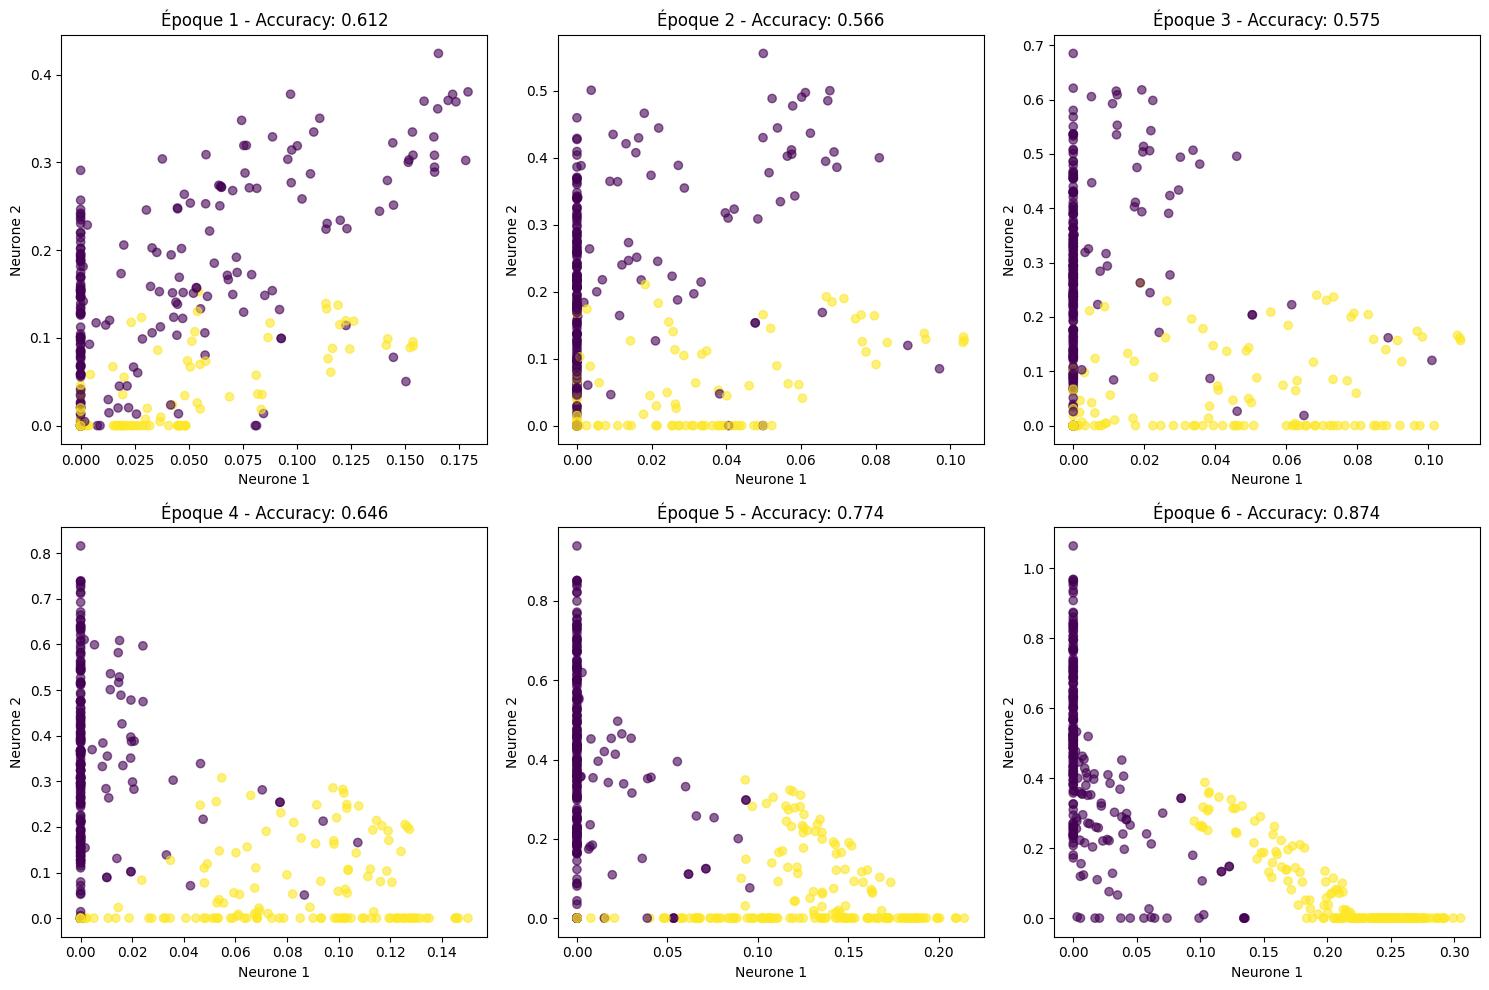

In [30]:
# Question 5, 6, 7 : Visualisation de la séparation des neurones
print("\n5-7) Visualisation de la séparation des neurones au fil des époques")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for epoch in range(6):
    # Entraîner pour 1 époque
    model.fit(X_train_banknotes, y_train_banknotes, epochs=1, verbose=0)

    # Obtenir les sorties de la première couche
    outputs = inp_to_out.predict(X_test_banknotes, verbose=0)

    # Évaluer l'accuracy
    _, accuracy = model.evaluate(X_test_banknotes, y_test_banknotes, verbose=0)

    # Tracer
    ax = axes[epoch]
    ax.scatter(outputs[:, 0], outputs[:, 1], c=y_test_banknotes, cmap='viridis', alpha=0.6)
    ax.set_xlabel('Neurone 1')
    ax.set_ylabel('Neurone 2')
    ax.set_title(f'Époque {epoch+1} - Accuracy: {accuracy:.3f}')

plt.tight_layout()
plt.show()


## ***EXERCICE 2 : Autoencodeur***




In [31]:
#  1 : Charger et normaliser MNIST
print("\n1) Chargement et normalisation de MNIST")
(X_train_mnist, _), (X_test_mnist, _) = mnist.load_data()

# Normaliser entre [0, 1]
X_train_mnist = X_train_mnist.astype('float32') / 255.0
X_test_mnist = X_test_mnist.astype('float32') / 255.0

# Redimensionner en vecteur 1D
X_train_mnist = X_train_mnist.reshape(-1, 28*28)
X_test_mnist = X_test_mnist.reshape(-1, 28*28)

print(f"Shape X_train: {X_train_mnist.shape}")
print(f"Shape X_test: {X_test_mnist.shape}")

#  2 : Construire l'autoencodeur
print("\n2) Construction du modèle autoencodeur")
autoencoder = Sequential()

# Couche d'encodage
autoencoder.add(Dense(32, activation='relu', input_shape=(784,)))

#  3 : Couche de sortie
autoencoder.add(Dense(784, activation='sigmoid'))

#  4
print("\n4) Compilation avec nadam et binary_crossentropy")
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

# 5 : Entraîner et prédire
print("\n5) Entraînement de l'autoencodeur")

# Créer des images bruitées
noise = np.random.normal(0, 0.5, X_test_mnist.shape)
X_test_noisy = X_test_mnist + noise
X_test_noisy = np.clip(X_test_noisy, 0, 1)

# Entraîner
autoencoder.fit(X_train_mnist, X_train_mnist, epochs=10, batch_size=256,
                validation_split=0.1, verbose=1)

# Prédire
decoded_imgs = autoencoder.predict(X_test_noisy)




1) Chargement et normalisation de MNIST
Shape X_train: (60000, 784)
Shape X_test: (10000, 784)

2) Construction du modèle autoencodeur

4) Compilation avec nadam et binary_crossentropy

5) Entraînement de l'autoencodeur
Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3891 - val_loss: 0.1960
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1854 - val_loss: 0.1587
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1538 - val_loss: 0.1381
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1351 - val_loss: 0.1257
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1236 - val_loss: 0.1170
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1159 - val_loss: 0.1112
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1103 - val_loss: 0.1068
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1060 - val_loss: 0.1037
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1027 - val_loss: 0.1


6) Affichage des images bruitées et décodées


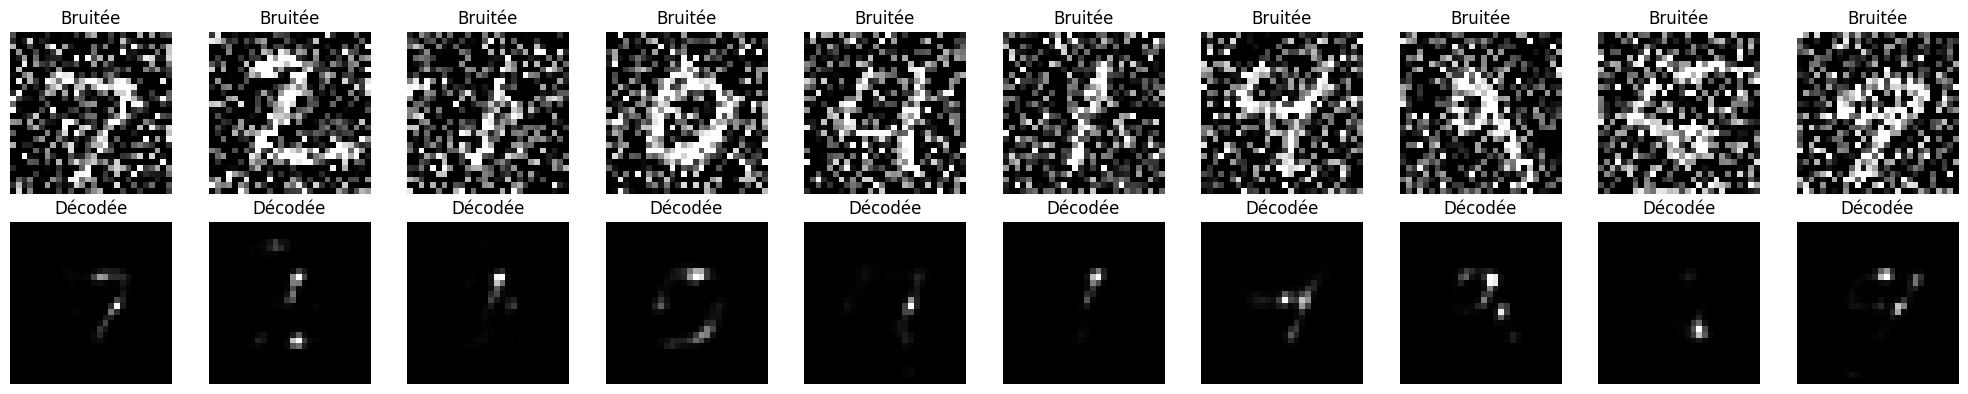

In [32]:
#  6 : Afficher les résultats
print("\n6) Affichage des images bruitées et décodées")
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Images bruitées
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Bruitée")
    plt.axis('off')

    # Images décodées
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Décodée")
    plt.axis('off')

plt.tight_layout()
plt.show()

## ***EXERCICE 3 : Modèle CNN pour MNIST***




In [33]:
# Recharger MNIST avec les labels
(X_train_cnn, y_train_cnn), (X_test_cnn, y_test_cnn) = mnist.load_data()

# Normaliser et redimensionner pour CNN
X_train_cnn = X_train_cnn.astype('float32') / 255.0
X_test_cnn = X_test_cnn.astype('float32') / 255.0
X_train_cnn = X_train_cnn.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_cnn.reshape(-1, 28, 28, 1)

# One-hot encoding des labels
y_train_cnn = keras.utils.to_categorical(y_train_cnn, 10)
y_test_cnn = keras.utils.to_categorical(y_test_cnn, 10)

# Question 1 : Créer le modèle CNN
print("\n1) Création du modèle CNN")
cnn_model = Sequential()

#  2 : Première couche de convolution et pooling
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))

#  3 : Deuxième couche de convolution et pooling
cnn_model.add(Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

#  4 : Flatten
cnn_model.add(Flatten())

#  5 : Couche de sortie
cnn_model.add(Dense(10, activation='softmax'))

#  6 : Configurer et entraîner
print("\n6) Configuration et entraînement du modèle")
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(cnn_model.summary())

cnn_model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=128,
              validation_data=(X_test_cnn, y_test_cnn), verbose=1)


1) Création du modèle CNN

6) Configuration et entraînement du modèle


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,954 (34.98 KB)

 Trainable params: 8,954 (34.98 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.7449 - loss: 0.8633 - val_accuracy: 0.9641 - val_loss: 0.1218
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9638 - loss: 0.1199 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9730 - loss: 0.0848 - val_accuracy: 0.9814 - val_loss: 0.0607
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9789 - loss: 0.0677 - val_accuracy: 0.9820 - val_loss: 0.0564
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9808 - loss: 0.0636 - val_accuracy: 0.9805 - val_loss: 0.0622



7) Création du modèle de visualisation des convolutions

8) Visualisation des sorties des couches convolutives
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


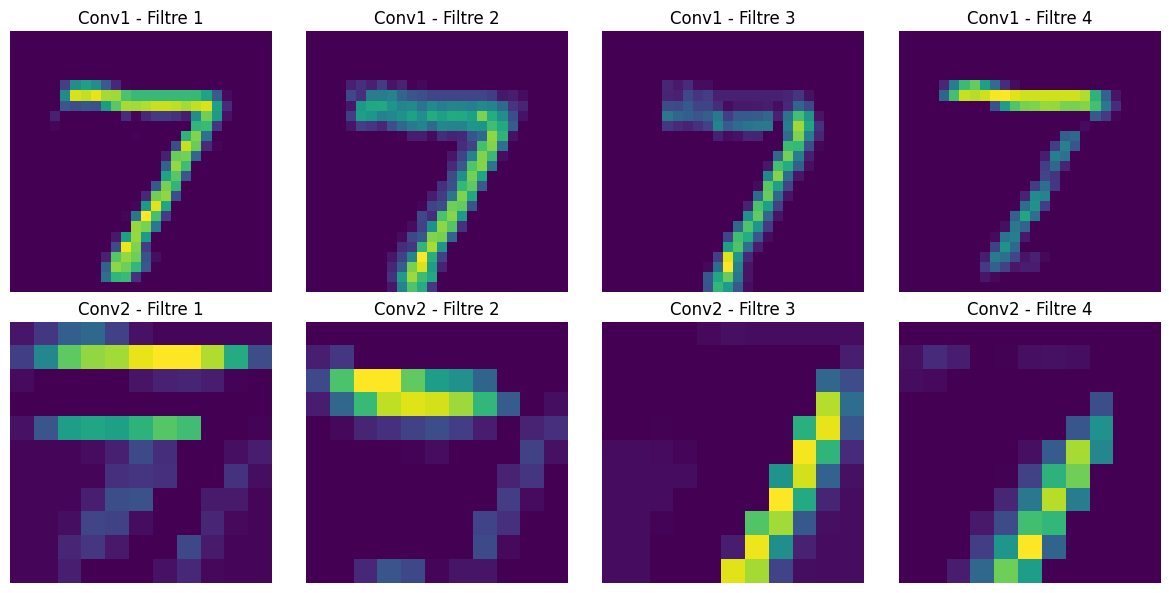


9-13) Utilisation de ResNet50

Chargement d'une image...

14-17) Prédiction avec ResNet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Top 3 prédictions:
1. zebra: 99.54%
2. hartebeest: 0.20%
3. gazelle: 0.13%


In [34]:
#  7 : Créer le modèle de visualisation des convolutions
print("\n7) Création du modèle de visualisation des convolutions")

# Reconstruire le modèle  pour la visualisation
input_layer = layers.Input(shape=(28, 28, 1))
conv1 = cnn_model.layers[0](input_layer)
pool1 = cnn_model.layers[1](conv1)
conv2 = cnn_model.layers[2](pool1)

visualization_model = Model(inputs=input_layer, outputs=[conv1, conv2])

#  8 : Prédire et afficher
print("\n8) Visualisation des sorties des couches convolutives")
conv1_features, conv2_features = visualization_model.predict(X_test_cnn[:1])

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Afficher 4 filtres de la première convolution
for i in range(4):
    axes[0, i].imshow(conv1_features[0, :, :, i], cmap='viridis')
    axes[0, i].set_title(f'Conv1 - Filtre {i+1}')
    axes[0, i].axis('off')

# Afficher 4 filtres de la deuxième convolution
for i in range(4):
    axes[1, i].imshow(conv2_features[0, :, :, i], cmap='viridis')
    axes[1, i].set_title(f'Conv2 - Filtre {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

#  9-13 : Utilisation de ResNet50
print("\n9-13) Utilisation de ResNet50")

# Charger une image (utiliser une des images fournies)
print("\nChargement d'une image...")
img_path = '000231.jpg'  # Remplacer par le chemin de votre image
img = image.load_img(img_path, target_size=(224, 224))

# Transformer en array
img_array = image.img_to_array(img)

# Prétraiter
img_preprocessed = preprocess_input(img_array)

# Ajouter une dimension
img_batch = np.expand_dims(img_preprocessed, axis=0)

#  14-17 : Prédiction avec ResNet50
print("\n14-17) Prédiction avec ResNet50")
resnet_model = ResNet50(weights='imagenet')

predictions = resnet_model.predict(img_batch)
decoded = decode_predictions(predictions, top=3)[0]

print("\nTop 3 prédictions:")
for i, (imagenet_id, label, score) in enumerate(decoded):
    print(f"{i+1}. {label}: {score*100:.2f}%")


## ***EXERCICE 4 : Prédiction de texte avec LSTM***


In [35]:
# Définir un texte
text = """The cat eats the mouse. The dog runs in the garden.
The mouse is small. The garden is big. The cat is black.
The dog is fast. The mouse runs fast."""

#  1 : Subdiviser en mots
print("\n1) Subdivision du texte en mots")
words = text.lower().split()
print(f"Nombre de mots: {len(words)}")

#  2 : Créer des lignes de 4 mots
print("\n2) Création des séquences de 4 mots")
lines = []
for i in range(len(words) - 3):
    line = ' '.join(words[i:i+4])
    lines.append(line)

print(f"Nombre de lignes: {len(lines)}")
print(f"Exemple: {lines[0]}")

#  3 : Tokenizer
print("\n3) Indexation avec Tokenizer")
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
vocab_size = len(tokenizer.word_index) + 1

print(f"Taille du vocabulaire: {vocab_size}")

#  4 : Transformer en séquences
print("\n4) Transformation en séquences de nombres")
sequences = tokenizer.texts_to_sequences(lines)
sequences = np.array(sequences)

print(f"Shape des séquences: {sequences.shape}")

# Séparer X et y
X_lstm = sequences[:, :3]
y_lstm = sequences[:, 3]

# One-hot encoding de y
y_lstm = keras.utils.to_categorical(y_lstm, num_classes=vocab_size)

#  5-8 : Construction et entraînement du LSTM
print("\n5-8) Construction et entraînement du modèle LSTM")

lstm_model = Sequential()

# Couche LSTM
lstm_model.add(LSTM(32, input_shape=(3, 1)))

# Couches denses
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(vocab_size, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(lstm_model.summary())

# Redimensionner X pour LSTM
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

lstm_model.fit(X_lstm, y_lstm, epochs=100, verbose=1)



1) Subdivision du texte en mots
Nombre de mots: 31

2) Création des séquences de 4 mots
Nombre de lignes: 28
Exemple: the cat eats the

3) Indexation avec Tokenizer
Taille du vocabulaire: 14

4) Transformation en séquences de nombres
Shape des séquences: (28, 4)

5-8) Construction et entraînement du modèle LSTM


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 14)             │           462 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,870 (22.93 KB)

 Trainable params: 5,870 (22.93 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0714 - loss: 2.6848
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0714 - loss: 2.6725
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0714 - loss: 2.6605
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0714 - loss: 2.6486
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0714 - loss: 2.6374
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0714 - loss: 2.6268
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0714 - loss: 2.6168
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0714 - loss: 2.6069
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0714 - loss: 2.5968
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0714 - loss: 2.5866
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0714 - loss: 2.5765
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0714 -

In [36]:
#  9-11 : Décoder les prédictions
print("\n9-11) Décodage des prédictions")

test_text = "The cat eats"
test_seq = tokenizer.texts_to_sequences([test_text])[0]
test_seq = np.array(test_seq).reshape(1, 3, 1)

prediction = lstm_model.predict(test_seq)
predicted_word_index = np.argmax(prediction)

predicted_word = tokenizer.index_word.get(predicted_word_index, "inconnu")

print(f"\nTexte de test: '{test_text}'")
print(f"Mot prédit: '{predicted_word}'")


9-11) Décodage des prédictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

Texte de test: 'The cat eats'
Mot prédit: 'the'
